# 🧪 Точный критерий Фишера (Fisher's Exact Test)

---

## 🎯 Назначение метода

**Точный критерий Фишера** — это непараметрический статистический тест, используемый для анализа таблиц сопряженности размера 2×2 (и более) при **малых ожидаемых частотах**.

### 📊 Когда применяется?

# Условия применения точного критерия Фишера:
1. n < 20 (малая выборка)
2. Ожидаемые частоты < 5
3. Любая ячейка таблицы содержит 0
4. Несбалансированные группы

ПРИМЕР: ЭФФЕКТИВНОСТЬ НОВОГО ЛЕКАРСТВА ПРИ РЕДКОМ ЗАБОЛЕВАНИИ

ТАБЛИЦА СОПРЯЖЕННОСТИ 2x2:
Группа        | Выздоровели | Не выздоровели | Всего
-------------------------------------------------------
Лечение (n=12) |       9      |        3        |  12
Контроль (n=8) |       2      |        6        |   8
Всего          |      11      |        9        |  20

ПРОЦЕНТ ВЫЗДОРОВЕВШИХ:
Группа лечения: 75.0% (9/12)
Группа контроля: 25.0% (2/8)

РЕЗУЛЬТАТЫ ТОЧНОГО КРИТЕРИЯ ФИШЕРА:
Отношение шансов (Odds Ratio): 9.000
p-значение: 0.0648
НЕ ЗНАЧИМО: p ≥ 0.05 - нет значимых различий между группами

ИНТЕРПРЕТАЦИЯ:
Шансы выздороветь в группе лечения в 9.0 раза выше,
чем в группе контроля

ОЖИДАЕМЫЕ ЧАСТОТЫ (для хи-квадрат):
Лечение: выздоровели 6.6, не выздоровели 5.4
Контроль: выздоровели 4.4, не выздоровели 3.6


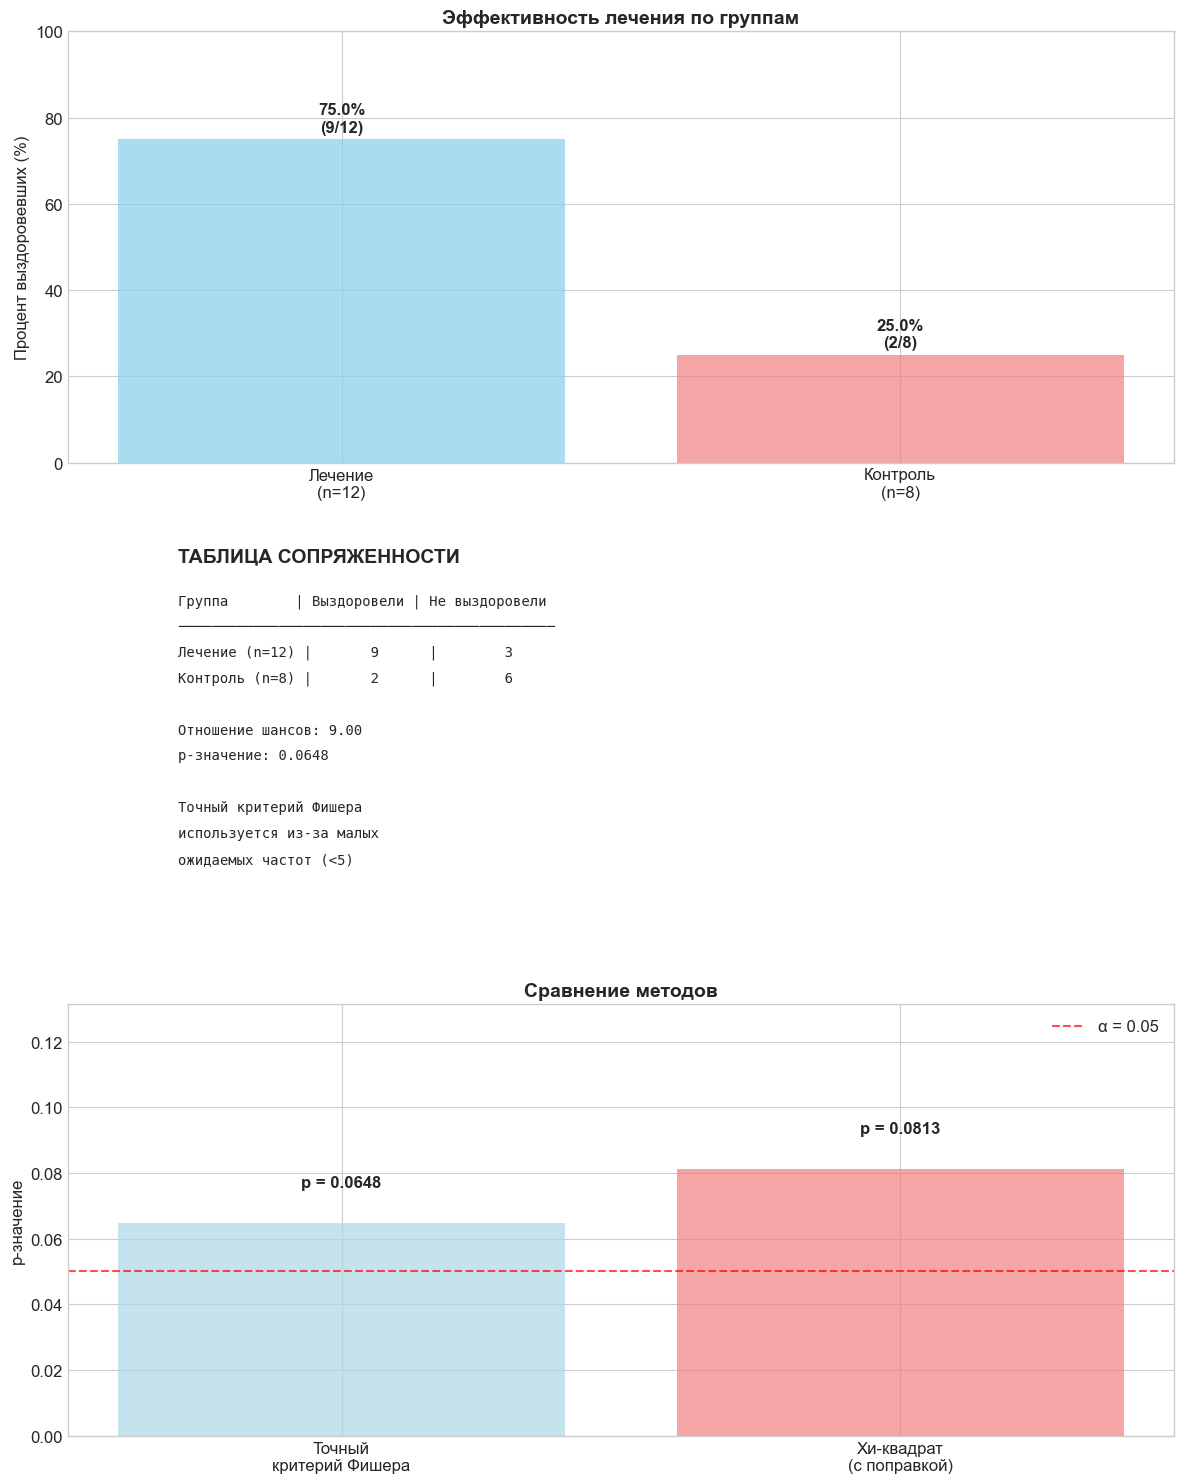

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import fisher_exact

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Создаем данные для нашего примера
# Таблица 2x2: [Выздоровели, Не выздоровели]
print("=" * 60)
print("ПРИМЕР: ЭФФЕКТИВНОСТЬ НОВОГО ЛЕКАРСТВА ПРИ РЕДКОМ ЗАБОЛЕВАНИИ")
print("=" * 60)

# Данные
treatment_group = np.array([[9, 3],   # 9 выздоровели, 3 не выздоровели
                           [2, 6]])   # в контрольной группе: 2 выздоровели, 6 не выздоровели

print("\nТАБЛИЦА СОПРЯЖЕННОСТИ 2x2:")
print("Группа        | Выздоровели | Не выздоровели | Всего")
print("-" * 55)
print(f"Лечение (n=12) |      {treatment_group[0,0]:2d}      |       {treatment_group[0,1]:2d}        |  12")
print(f"Контроль (n=8) |      {treatment_group[1,0]:2d}      |       {treatment_group[1,1]:2d}        |   8")
print(f"Всего          |      {treatment_group[:,0].sum():2d}      |       {treatment_group[:,1].sum():2d}        |  20")

# Вычисляем проценты для наглядности
treatment_recovery_rate = treatment_group[0,0] / treatment_group[0,:].sum() * 100
control_recovery_rate = treatment_group[1,0] / treatment_group[1,:].sum() * 100

print(f"\nПРОЦЕНТ ВЫЗДОРОВЕВШИХ:")
print(f"Группа лечения: {treatment_recovery_rate:.1f}% ({treatment_group[0,0]}/{treatment_group[0,:].sum()})")
print(f"Группа контроля: {control_recovery_rate:.1f}% ({treatment_group[1,0]}/{treatment_group[1,:].sum()})")

# Применяем точный критерий Фишера
odds_ratio, p_value = fisher_exact(treatment_group)

print(f"\nРЕЗУЛЬТАТЫ ТОЧНОГО КРИТЕРИЯ ФИШЕРА:")
print(f"Отношение шансов (Odds Ratio): {odds_ratio:.3f}")
print(f"p-значение: {p_value:.4f}")

# Интерпретация
alpha = 0.05
if p_value < alpha:
    print(f"СТАТИСТИЧЕСКИ ЗНАЧИМО: p < {alpha} - есть значимые различия между группами")
else:
    print(f"НЕ ЗНАЧИМО: p ≥ {alpha} - нет значимых различий между группами")

print(f"\nИНТЕРПРЕТАЦИЯ:")
print(f"Шансы выздороветь в группе лечения в {odds_ratio:.1f} раза выше,")
print(f"чем в группе контроля")

# Визуализация 1: Столбчатая диаграмма
fig, ((ax1, ax2, ax4)) = plt.subplots(3, 1, figsize=(12, 15))

# График 1: Процент выздоровевших
groups = ['Лечение\n(n=12)', 'Контроль\n(n=8)']
recovery_rates = [treatment_recovery_rate, control_recovery_rate]
counts = [f"{treatment_group[0,0]}/12", f"{treatment_group[1,0]}/8"]

bars = ax1.bar(groups, recovery_rates, color=['skyblue', 'lightcoral'], alpha=0.7)
ax1.set_ylabel('Процент выздоровевших (%)', fontsize=12)
ax1.set_title('Эффективность лечения по группам', fontsize=14, fontweight='bold')

# Добавляем значения на столбцы
for bar, rate, count in zip(bars, recovery_rates, counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{rate:.1f}%\n({count})', ha='center', va='bottom', fontweight='bold')

ax1.set_ylim(0, 100)

# График 2: Мозаичный график (модифицированный)
ax2.axis('off')
ax2.text(0.1, 0.9, 'ТАБЛИЦА СОПРЯЖЕННОСТИ', fontsize=14, fontweight='bold', 
         transform=ax2.transAxes)

# Создаем текстовое представление таблицы
table_text = [
    "Группа        | Выздоровели | Не выздоровели",
    "─" * 45,
    f"Лечение (n=12) |      {treatment_group[0,0]:2d}      |       {treatment_group[0,1]:2d}",
    f"Контроль (n=8) |      {treatment_group[1,0]:2d}      |       {treatment_group[1,1]:2d}",
    "",
    f"Отношение шансов: {odds_ratio:.2f}",
    f"p-значение: {p_value:.4f}",
    "",
    "Точный критерий Фишера",
    "используется из-за малых",
    "ожидаемых частот (<5)"
]

for i, line in enumerate(table_text):
    ax2.text(0.1, 0.8 - i*0.06, line, fontfamily='monospace', 
             transform=ax2.transAxes, fontsize=10)
"""
# График 3: Отношение шансов
ax3.barh(['Отношение шансов'], [odds_ratio], color='lightgreen', alpha=0.7)
ax3.axvline(x=1, color='red', linestyle='--', alpha=0.7, label='Нет эффекта (OR=1)')
ax3.set_xlabel('Отношение шансов (Odds Ratio)')
ax3.set_title('Эффективность лечения: отношение шансов', fontsize=14, fontweight='bold')
ax3.legend()

# Добавляем значение
ax3.text(odds_ratio + 0.1, 0, f'OR = {odds_ratio:.2f}', 
         va='center', fontweight='bold')
"""
# График 4: Сравнение с критерием Хи-квадрат (для демонстрации проблемы)
# Вычислим ожидаемые частоты для хи-квадрат
total = treatment_group.sum()
row_totals = treatment_group.sum(axis=1)
col_totals = treatment_group.sum(axis=0)

expected = np.outer(row_totals, col_totals) / total

print(f"\nОЖИДАЕМЫЕ ЧАСТОТЫ (для хи-квадрат):")
print(f"Лечение: выздоровели {expected[0,0]:.1f}, не выздоровели {expected[0,1]:.1f}")
print(f"Контроль: выздоровели {expected[1,0]:.1f}, не выздоровели {expected[1,1]:.1f}")

# Проверим условие для хи-квадрат (все ожидаемые >= 5)
chi2_appropriate = (expected >= 5).all()

# Выполним хи-квадрат для сравнения
chi2_stat, chi2_p, dof, expected_chi2 = stats.chi2_contingency(treatment_group, correction=True)

methods = ['Точный\nкритерий Фишера', 'Хи-квадрат\n(с поправкой)']
p_values = [p_value, chi2_p]
colors = ['lightblue', 'lightcoral']

bars = ax4.bar(methods, p_values, color=colors, alpha=0.7)
ax4.axhline(y=0.05, color='red', linestyle='--', alpha=0.7, label='α = 0.05')
ax4.set_ylabel('p-значение')
ax4.set_title('Сравнение методов', fontsize=14, fontweight='bold')
ax4.legend()

# Добавляем значения на столбцы
for bar, p_val in zip(bars, p_values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'p = {p_val:.4f}', ha='center', va='bottom', fontweight='bold')

ax4.set_ylim(0, max(p_values) + 0.05)

plt.tight_layout()
plt.show()




ЧТО БЫЛО БЫ ПРИ БОЛЬШЕЙ ВЫБОРКЕ?

УВЕЛИЧЕННАЯ ВЫБОРКА (в 10 раз больше):
Лечение: 90 выздоровели, 30 не выздоровели
Контроль: 20 выздоровели, 60 не выздоровели

СРАВНЕНИЕ НА БОЛЬШОЙ ВЫБОРКЕ:
Точный критерий Фишера: p = 0.000000
Хи-квадрат: p = 0.000000


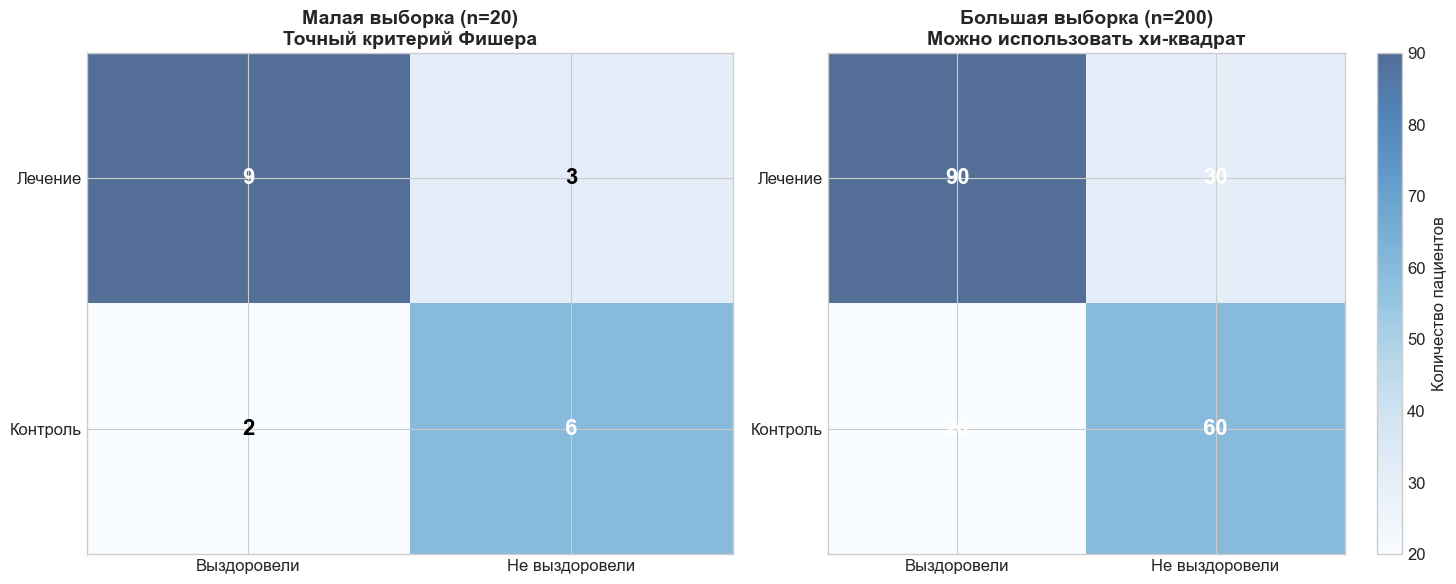

In [10]:
# Дополнительный анализ: что было бы при большей выборке
print("\n" + "=" * 60)
print("ЧТО БЫЛО БЫ ПРИ БОЛЬШЕЙ ВЫБОРКЕ?")
print("=" * 60)

# Увеличиваем выборку в 10 раз, сохраняя пропорции
large_sample = treatment_group * 10

print("\nУВЕЛИЧЕННАЯ ВЫБОРКА (в 10 раз больше):")
print(f"Лечение: {large_sample[0,0]} выздоровели, {large_sample[0,1]} не выздоровели")
print(f"Контроль: {large_sample[1,0]} выздоровели, {large_sample[1,1]} не выздоровели")

# Сравним оба теста на увеличенной выборке
fisher_large = fisher_exact(large_sample)
chi2_large = stats.chi2_contingency(large_sample, correction=True)

print(f"\nСРАВНЕНИЕ НА БОЛЬШОЙ ВЫБОРКЕ:")
print(f"Точный критерий Фишера: p = {fisher_large[1]:.6f}")
print(f"Хи-квадрат: p = {chi2_large[1]:.6f}")

# Визуализация сравнения малой и большой выборки
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Малая выборка
ax1.imshow(treatment_group, cmap='Blues', alpha=0.7, aspect='auto')
ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_xticklabels(['Выздоровели', 'Не выздоровели'])
ax1.set_yticklabels(['Лечение', 'Контроль'])
ax1.set_title('Малая выборка (n=20)\nТочный критерий Фишера', fontsize=14, fontweight='bold')

# Добавляем числа в ячейки
for i in range(2):
    for j in range(2):
        ax1.text(j, i, f'{treatment_group[i, j]}', ha='center', va='center', 
                fontsize=16, fontweight='bold', color='white' if treatment_group[i, j] > 4 else 'black')

# Большая выборка
im = ax2.imshow(large_sample, cmap='Blues', alpha=0.7, aspect='auto')
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xticklabels(['Выздоровели', 'Не выздоровели'])
ax2.set_yticklabels(['Лечение', 'Контроль'])
ax2.set_title('Большая выборка (n=200)\nМожно использовать хи-квадрат', fontsize=14, fontweight='bold')

# Добавляем числа в ячейки
for i in range(2):
    for j in range(2):
        ax2.text(j, i, f'{large_sample[i, j]}', ha='center', va='center', 
                fontsize=16, fontweight='bold', color='white')

plt.colorbar(im, ax=ax2, label='Количество пациентов')
plt.tight_layout()
plt.show()